Spark Ćwiczenia

In [21]:
from pyspark.sql import SparkSession

In [23]:
import pandas as pd

In [25]:
import numpy as np

In [27]:
spark = SparkSession.builder.getOrCreate()

In [29]:
spark

In [31]:
airports = spark.read.csv("airports.csv",inferSchema=True,header=True)

In [33]:
airports.toPandas()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [35]:
from pyspark.sql.functions import col, asc

Zadania

nr1 Print all the airports that are to the North from Krakow.

In [ ]:
airports.filter(col("LATITUDE") > 50).toPandas()

nr2 For each state, find the airport which is closest to the South Pole.

In [28]:
import matplotlib

In [30]:
pd_airports = airports.select("longitude", "latitude").toPandas()

In [32]:
pd_airports

,longitude,latitude
0,-75.44040,40.65236
1,-99.68190,32.41132
2,-106.60919,35.04022
3,-98.42183,45.44906
4,-84.19447,31.53552
...,...,...
317,-132.36982,56.48433
318,-111.11764,44.68840
319,-94.30681,36.28187
320,-139.66023,59.50336


nr3 Plot the coordinates of all the airports. Bonus: plot on the map.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

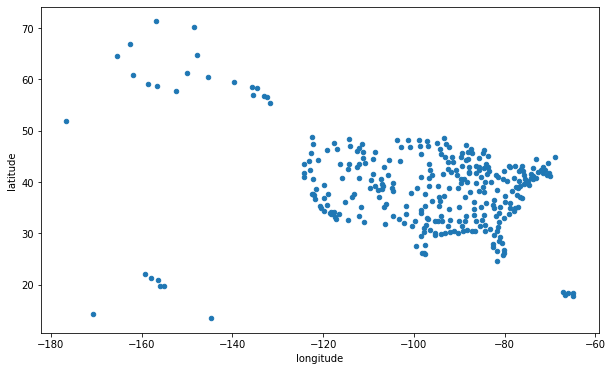

In [34]:
pd_airports.plot.scatter(x="longitude", y="latitude",figsize=(10, 6))

In [36]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)

AnalysisException: Path does not exist: file:/home/vienio99/Documents/Projects/spk/countries of the world.csv

In [38]:
countries.toPandas()

NameError: name 'countries' is not defined

nr4 Plot GDP vs. Phones for all countries in Asia.

In [19]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf

In [20]:
def to_float (s) :
   return float(s.replace(',','.'))

In [21]:
float_udf = udf(to_float , FloatType())

In [22]:
full_countries = countries.select("Region",'GDP ($ per capita)',"Phones (per 1000)" ).na.drop()

In [23]:
full_countries = full_countries.withColumn("Phones", float_udf("Phones (per 1000)"))

In [24]:
full_countries.show()

+--------------------+------------------+-----------------+------+
|              Region|GDP ($ per capita)|Phones (per 1000)|Phones|
+--------------------+------------------+-----------------+------+
|ASIA (EX. NEAR EA...|               700|              3,2|   3.2|
|EASTERN EUROPE   ...|              4500|             71,2|  71.2|
|NORTHERN AFRICA  ...|              6000|             78,1|  78.1|
|OCEANIA          ...|              8000|            259,5| 259.5|
|WESTERN EUROPE   ...|             19000|            497,2| 497.2|
|SUB-SAHARAN AFRIC...|              1900|              7,8|   7.8|
|LATIN AMER. & CAR...|              8600|            460,0| 460.0|
|LATIN AMER. & CAR...|             11000|            549,9| 549.9|
|LATIN AMER. & CAR...|             11200|            220,4| 220.4|
|C.W. OF IND. STATES |              3500|            195,7| 195.7|
|LATIN AMER. & CAR...|             28000|            516,1| 516.1|
|OCEANIA          ...|             29000|            565,5| 56

In [25]:
pd_asia = full_countries.select("GDP ($ per capita)", "Phones")\
.where(col("Region").like("%ASIA%")).toPandas()

In [26]:
pd_asia

,GDP ($ per capita),Phones
0,700,3.200000
1,1900,7.300000
2,1300,14.300000
3,18600,237.199997
4,1800,10.100000
5,1900,2.600000
6,5000,266.700012
7,28800,546.700012
8,2900,45.400002
9,3200,52.000000


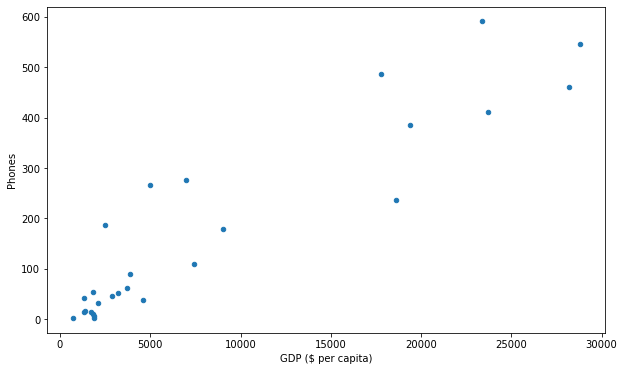

In [27]:
pd_asia.plot(x="GDP ($ per capita)", y="Phones", kind="scatter",figsize=(10, 6))

nr5 Plot Infant mortality vs. Literacy for top 30 richest and top 30 poorest countries.